In [9]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist 

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


In [3]:
# number of labels
num_labels = len(np.unique(y_train))

In [4]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
# image dimension
image_size = x_train.shape[1]


784


In [10]:
#resize and normalize
x_train = np.reshape(x_train,[-1,image_size,image_size,1])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test,[-1,image_size,image_size,1])
x_test = x_test.astype('float32') / 255

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [14]:
# network parameters
input_shape = (image_size,image_size,1)
batch_size = 128
kernel_size = (3,3)
pool_size = 2
filters = 64
dropout = 0.2

In [34]:
model = Sequential()

In [35]:
model.add(Conv2D(filters = filters, kernel_size = kernel_size, activation = 'relu', input_shape = input_shape))

In [36]:
model.add(MaxPooling2D(pool_size))

In [37]:
model.add(Conv2D(filters = filters, kernel_size = kernel_size, activation = 'relu'))

In [38]:
model.add(MaxPooling2D(pool_size))

In [39]:
model.add(Conv2D(filters = filters, kernel_size = kernel_size, activation = 'relu'))

In [40]:
model.add(Flatten())

In [41]:
model.add(Dropout(dropout))

In [42]:
model.add(Dense(num_labels))

In [43]:
model.add(Activation('softmax'))

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 576)              

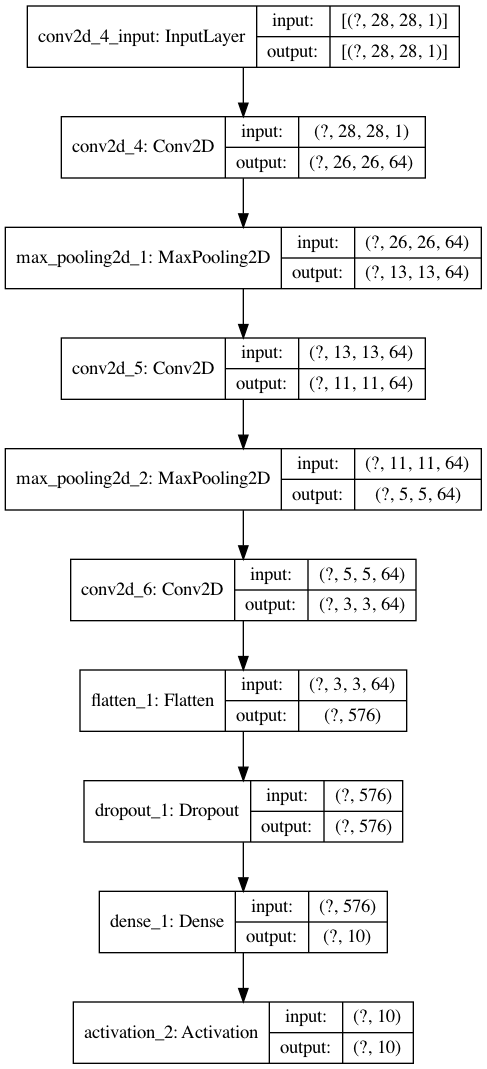

In [46]:
plot_model(model,to_file='cnn-mnist.png',show_shapes = True)

In [47]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [48]:
model.fit(x_train,y_train,epochs = 10,batch_size=batch_size)

Epoch 1/10
469/469 [==============================] - 54s 115ms/step - loss: 1.1600 - accuracy: 0.6055
Epoch 2/10
469/469 [==============================] - 64s 136ms/step - loss: 0.4129 - accuracy: 0.8716
Epoch 3/10
469/469 [==============================] - 60s 127ms/step - loss: 0.2922 - accuracy: 0.9111
Epoch 4/10
469/469 [==============================] - 60s 128ms/step - loss: 0.2214 - accuracy: 0.9328
Epoch 5/10
469/469 [==============================] - 60s 128ms/step - loss: 0.1821 - accuracy: 0.9459
Epoch 6/10
469/469 [==============================] - 60s 127ms/step - loss: 0.1560 - accuracy: 0.9530
Epoch 7/10
469/469 [==============================] - 59s 125ms/step - loss: 0.1352 - accuracy: 0.9576
Epoch 8/10
469/469 [==============================] - 57s 121ms/step - loss: 0.1242 - accuracy: 0.9619
Epoch 9/10
469/469 [==============================] - 57s 122ms/step - loss: 0.1130 - accuracy: 0.9647
Epoch 10/10
469/469 [==============================] - 57s 122ms/step - l

In [49]:
_ , acc = model.evaluate(x_test,y_test,batch_size=batch_size,verbose=1)

79/79 [==============================] - 2s 26ms/step - loss: 0.0736 - accuracy: 0.9763


In [50]:
print("Test Accuracy: %.1f%%" %(100*acc))

Test Accuracy: 97.6%
